In [1]:
# importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
# reading the test and train data
train=pd.read_csv('train_s3TEQDk.csv')
test=pd.read_csv('test_mSzZ8RL.csv')

In [3]:
train.shape, test.shape

((245725, 11), (105312, 10))

In [4]:
# checking for null values in the train data
train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [5]:
# checking for null values in the test data
test.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [7]:
# filling the null values in the Credit_Product with 'NA'
train.Credit_Product.fillna('Other', inplace=True)
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


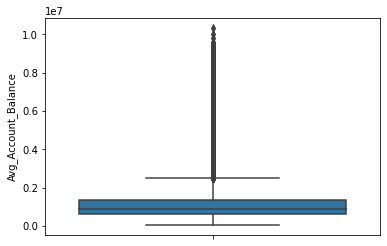

In [8]:
sns.boxplot(y=train.Avg_Account_Balance)
plt.show()

In [9]:
# creating the 10 bins for Avg_Account_Balance
train.Avg_Account_Balance=pd.qcut(train.Avg_Account_Balance, q=10, labels=[0,1,2,3,4,5,6,7,8,9])
train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,5,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,2,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,7,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,1,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,4,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,1,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,Other,6,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,1,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,7,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,8,No,0


In [10]:
# train.Avg_Account_Balance.min()

In [11]:
# performing the label encoding for relevant variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Gender'] = le.fit_transform(train['Gender'])
train['Region_Code'] = le.fit_transform(train['Region_Code'])
train['Occupation'] = le.fit_transform(train['Occupation'])
train['Channel_Code'] = le.fit_transform(train['Channel_Code'])
train['Credit_Product'] = le.fit_transform(train['Credit_Product'])
train['Is_Active'] = le.fit_transform(train['Is_Active'])

In [12]:
# created seperate file for all the cleaned data as 'train_filtered.csv'
train.to_csv('train_filtered.csv',index=False)

In [13]:
# reading the recently created file 
train_filtered=pd.read_csv('./train_filtered.csv')
train_filtered.Avg_Account_Balance.describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    245725.000000
mean          4.499953
std           2.872306
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
90%           8.000000
95%           9.000000
99%           9.000000
max           9.000000
Name: Avg_Account_Balance, dtype: float64

In [14]:
train_filtered=train_filtered[train_filtered.Avg_Account_Balance<train_filtered.Avg_Account_Balance.quantile(0.99)]

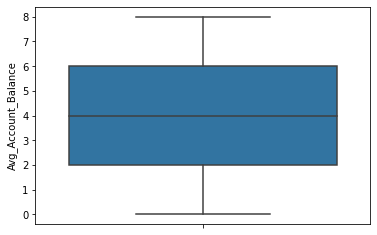

In [15]:
sns.boxplot(y=train_filtered.Avg_Account_Balance)
plt.show()

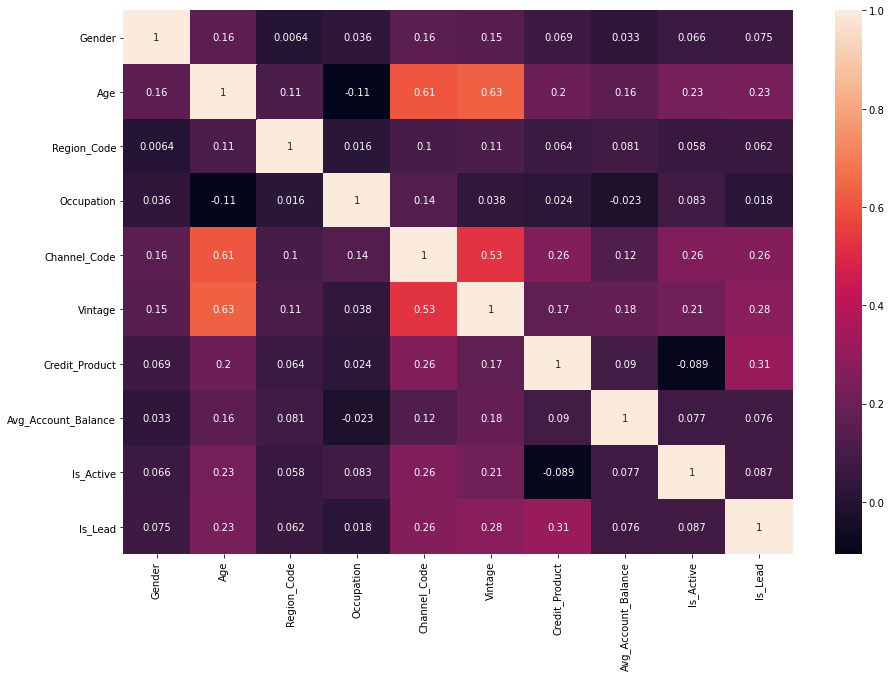

In [16]:
# heatmap to check for correlation
plt.figure(figsize=(15,10))
sns.heatmap(train_filtered.corr(), annot=True)
plt.show()

In [17]:
# deleting the ID column
del train_filtered['ID']

### Test data

In [18]:
# filling with Other values
test.Credit_Product.fillna('Other', inplace=True)


In [19]:
# creating bins for Avg_Account_Balance
test.Avg_Account_Balance=pd.qcut(test.Avg_Account_Balance, q=10, labels=[0,1,2,3,4,5,6,7,8,9])


In [20]:
# performing label encoding
test['Gender'] = le.fit_transform(test['Gender'])
test['Region_Code'] = le.fit_transform(test['Region_Code'])
test['Occupation'] = le.fit_transform(test['Occupation'])
test['Channel_Code'] = le.fit_transform(test['Channel_Code'])
test['Credit_Product'] = le.fit_transform(test['Credit_Product'])
test['Is_Active'] = le.fit_transform(test['Is_Active'])

In [21]:
test.to_csv('test_filtered.csv',index=False)

In [22]:
test_filtered=pd.read_csv('./test_filtered.csv')

In [23]:
X=train_filtered.drop(columns=['Is_Lead'],axis=1)
y=train_filtered.Is_Lead

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
# dividing the data into test and train data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [26]:
import xgboost as xgb
from sklearn import metrics

# xgclf = xgb.XGBClassifier()

# xgclf.fit(X_train, y_train)

In [27]:
final_model = xgb.XGBClassifier(learning_rate=0.1,
                                max_depth=7,
                                n_estimators=50, random_state=42)

final_model.fit(X_train, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(X_train)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test)[:, 1]))

AUC on train data by XGBoost = 0.8818659542653883
AUC on test data by XGBoost = 0.874143425265639


In [28]:
#  predicting the probabilty and converting the final values into a dataframe
data = final_model.predict_proba(test_filtered.loc[:, test_filtered.columns != 'ID'])
values = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1]})

In [29]:
# creating a new column Is_Lead in the test data 
test_filtered['Is_Lead']=values['Column2']

In [30]:
test_filtered

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,VBENBARO,1,29,4,1,0,25,2,3,0,0.035669
1,CCMEWNKY,1,43,18,1,1,49,1,5,0,0.886548
2,VK3KGA9M,1,31,20,2,0,14,0,0,0,0.056219
3,TT8RPZVC,1,29,22,1,0,33,0,4,0,0.020011
4,SHQZEYTZ,0,29,20,1,0,19,0,2,0,0.020225
...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,1,52,18,2,1,86,2,9,1,0.965739
105308,CWQ72DWS,1,55,27,1,1,86,2,6,0,0.577616
105309,HDESC8GU,1,35,4,2,3,15,0,8,0,0.073288
105310,2PW4SFCA,1,53,4,1,2,93,0,3,1,0.219368


In [31]:
# Converting the respective columns into the final submission csv file
test_filtered[['ID','Is_Lead']].to_csv('mysubmission.csv', index=False)